In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq
from datetime import datetime,date,timedelta
from functions import *
from nvix import NVIX
from cboe import CBOE 
from scipy.interpolate import interp1d
mpl.rcParams["figure.dpi"] = 480
mpl.rcParams["figure.figsize"] = (10,6)
plt.style.use("ggplot")
spx = yf.Ticker("^SPX")
time_chain = list(map(lambda x:datetime.strptime(x, "%Y-%m-%d"),spx.options))

# Parameters A

In [2]:
call_A = pd.read_csv("call_A.csv")
put_A = pd.read_csv("put_A.csv")
heston = {"call":call_A,"put":put_A}
nvix_A = NVIX(0,heston)
cboe_A = CBOE(0,heston)

In [3]:
0.2 + (1-np.exp(-1*30/365))/(30/365) * (0.6-0.2)

0.5840029057260867

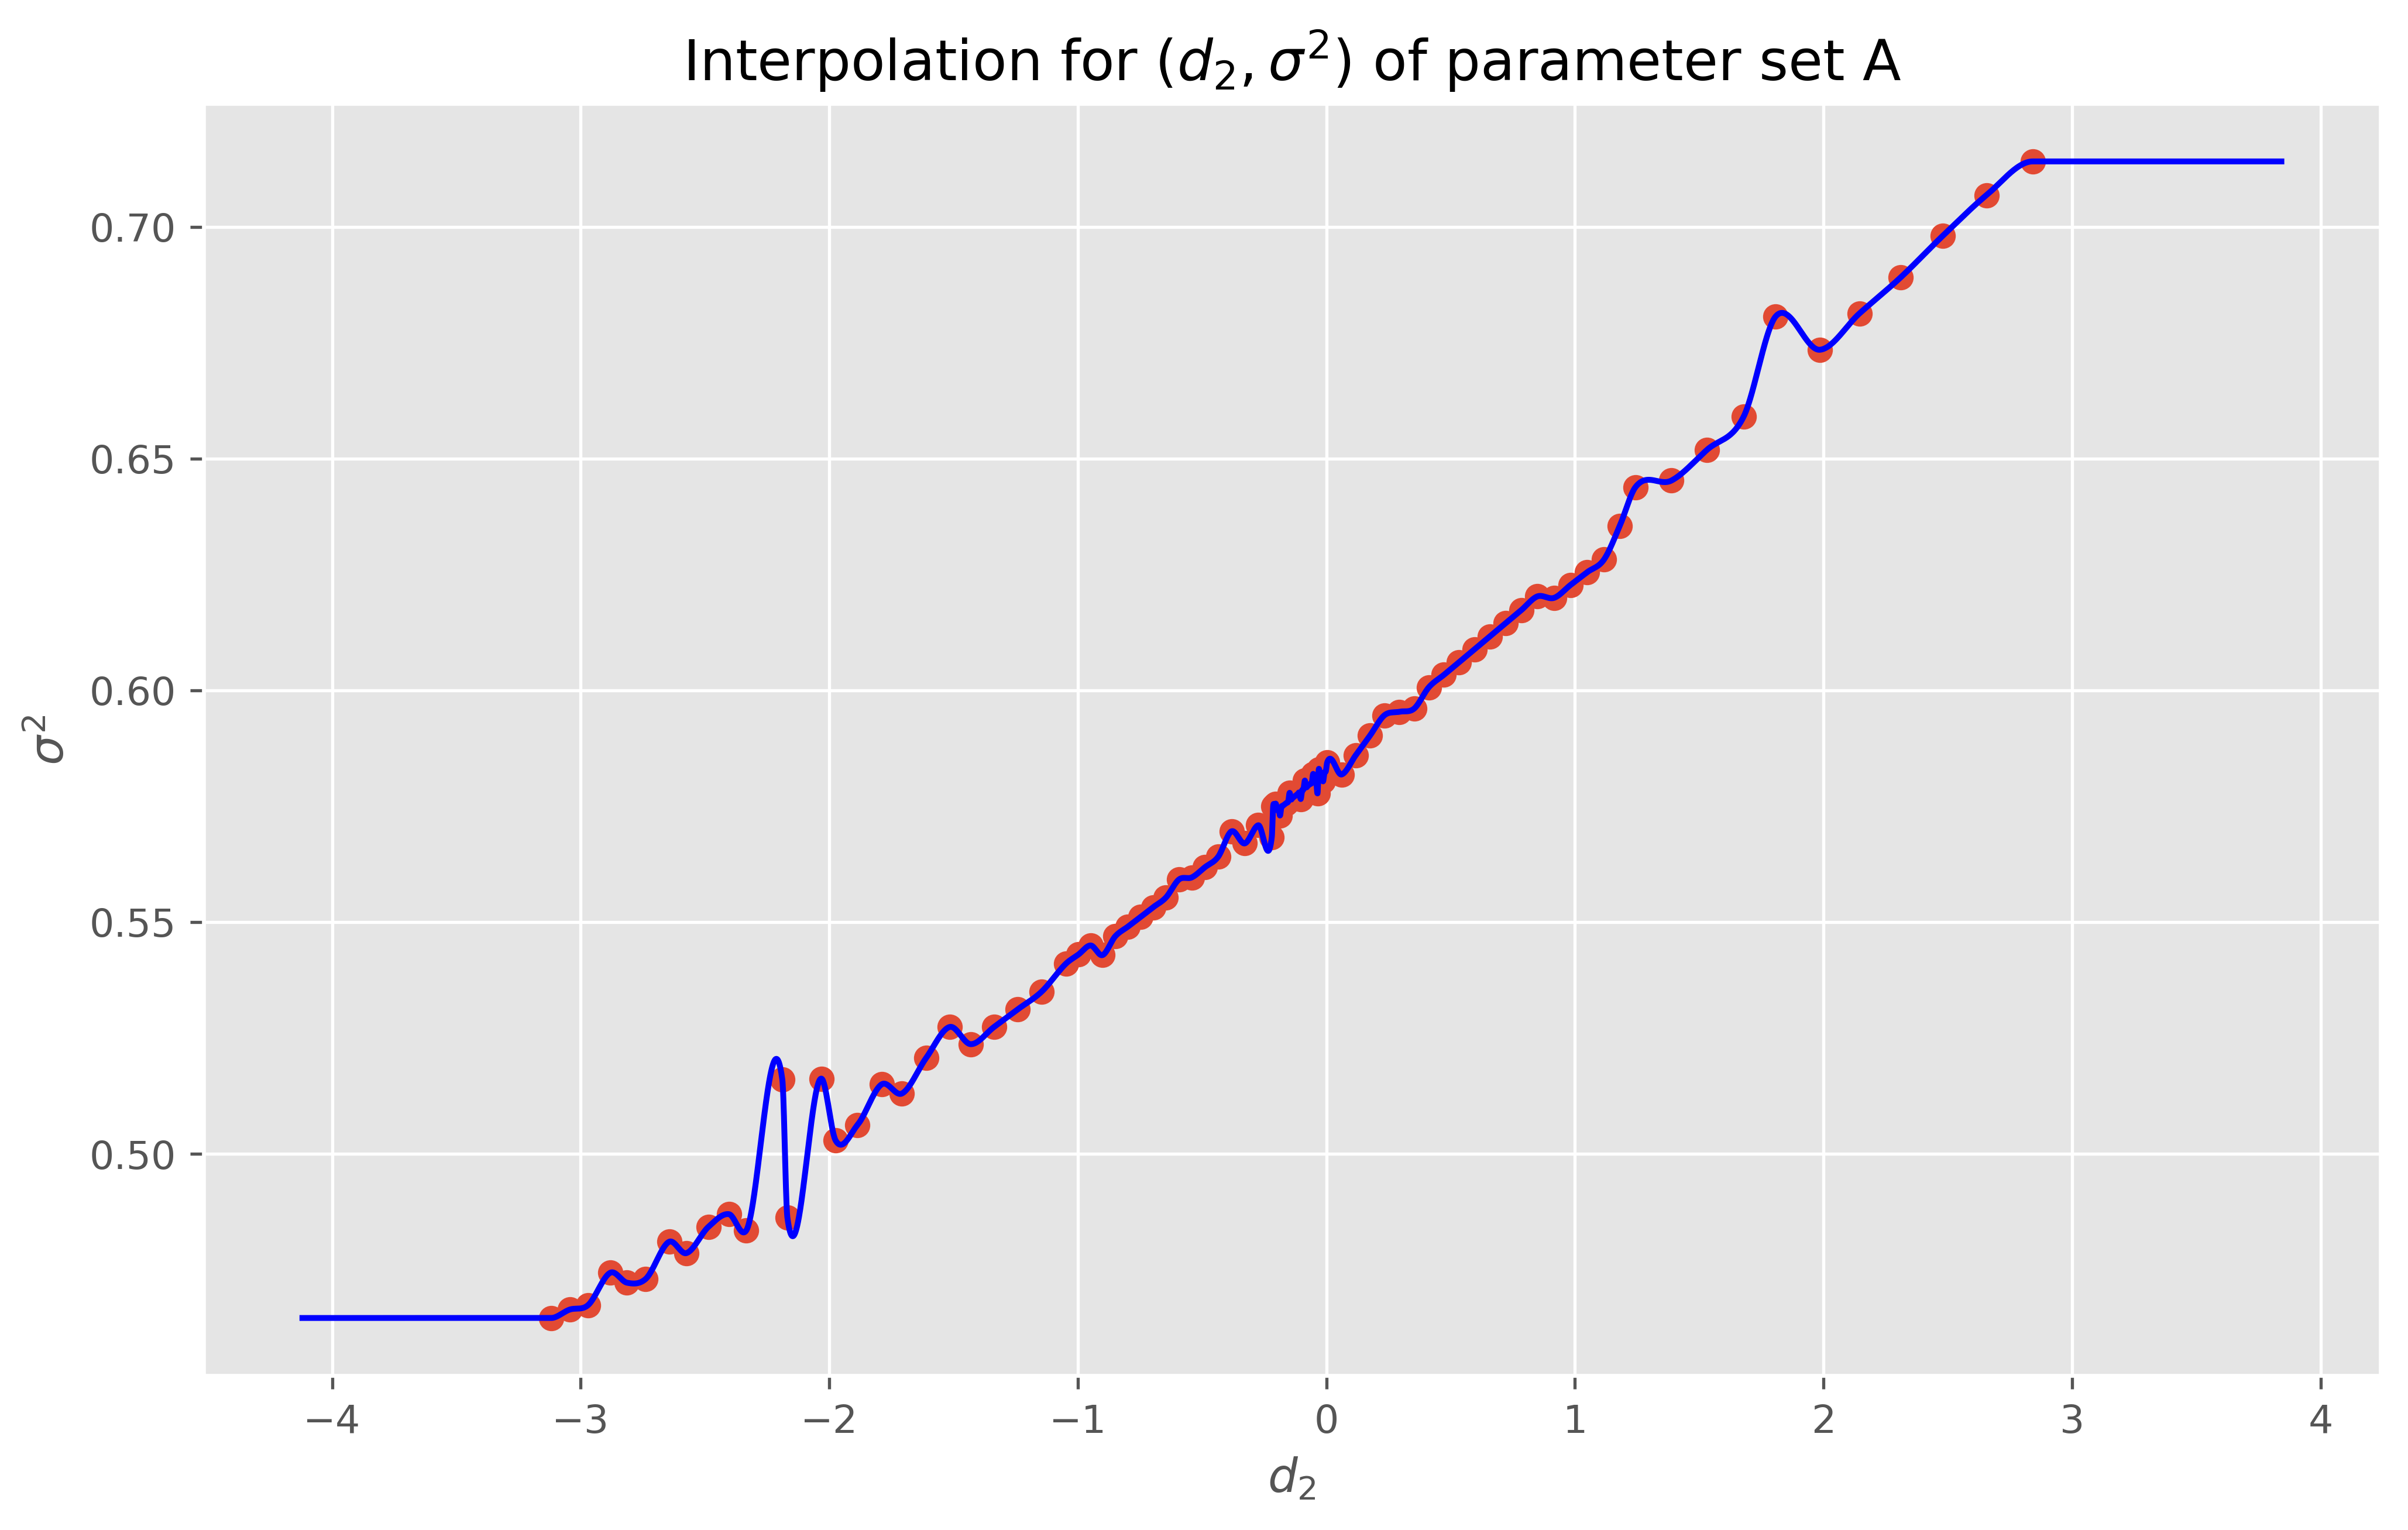

In [4]:
nvix_A.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set A")
plt.savefig('A_narrow.eps', format='eps')

# Parameter B

In [5]:
call_B = pd.read_csv("call_B.csv")
put_B = pd.read_csv("put_B.csv")
heston = {"call":call_B,"put":put_B}
nvix_B = NVIX(0,heston)
cboe_B = CBOE(0,heston)

In [6]:
0.2 + (1-np.exp(-1*30/365))/(30/365) * (0.6-0.2)

0.5840029057260867

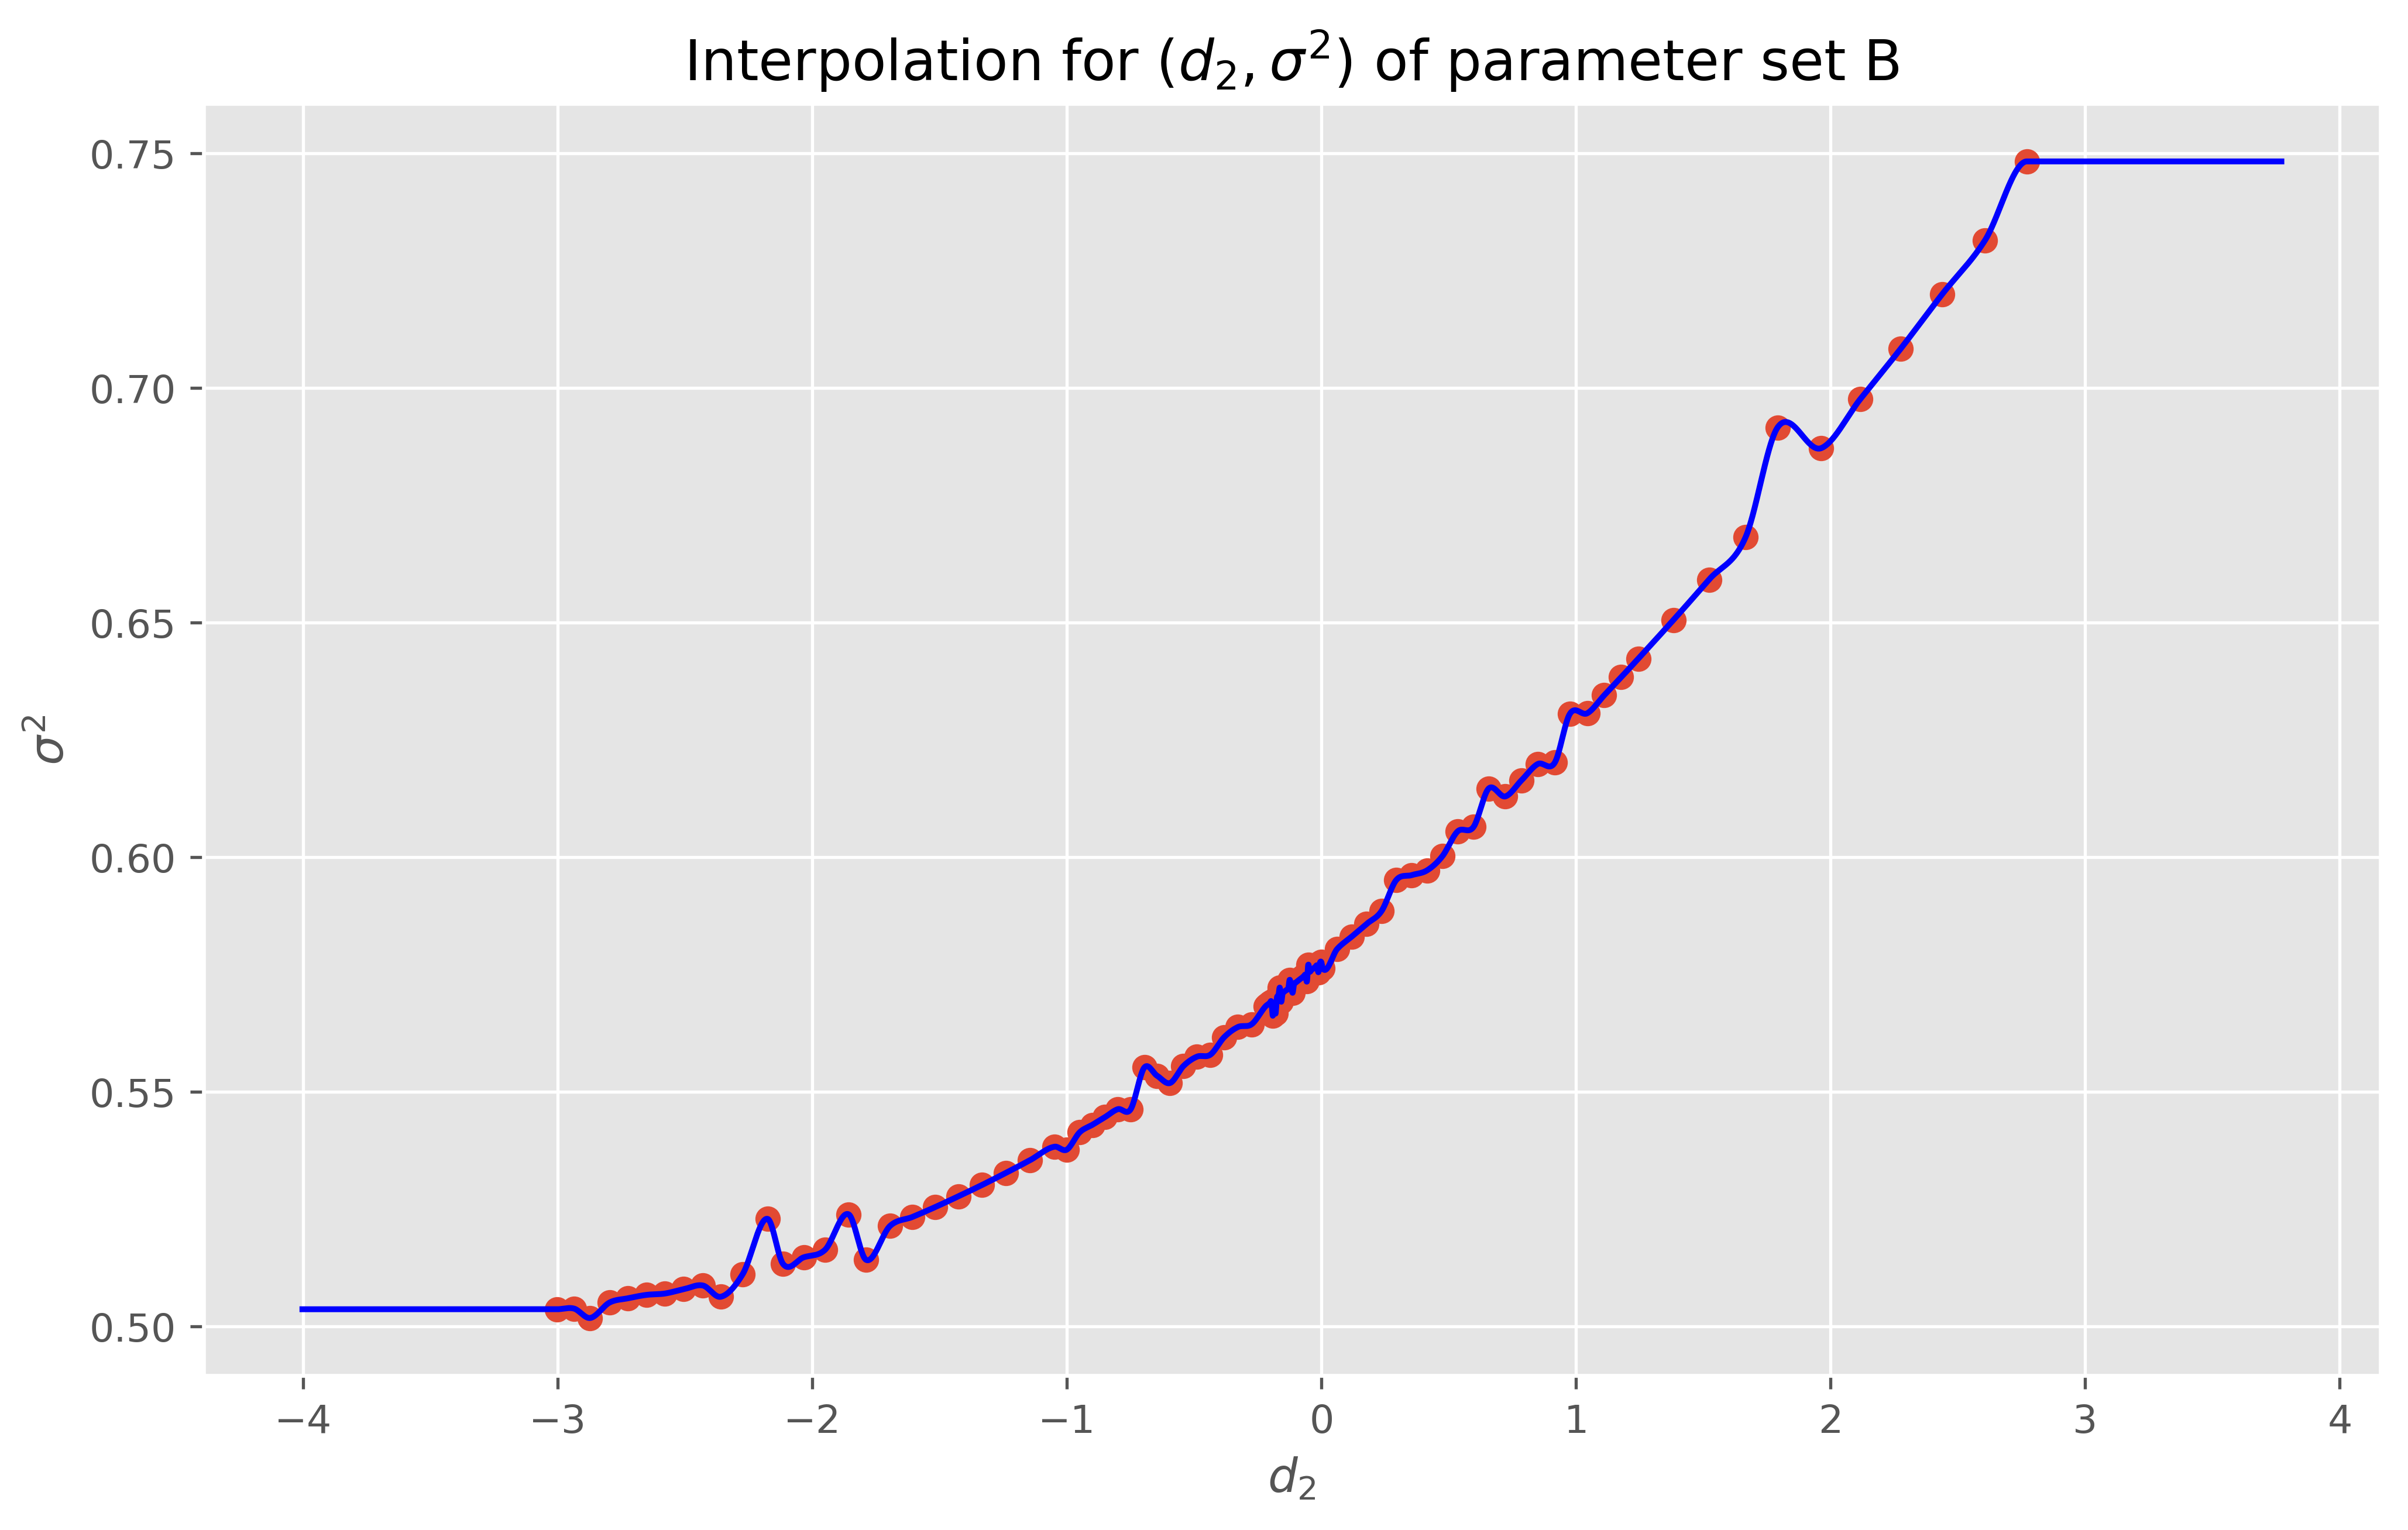

In [7]:
nvix_B.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set B")
plt.savefig('B_narrow.eps', format='eps')

# Parameter C

In [8]:
call_C = pd.read_csv("call_C.csv")
put_C = pd.read_csv("put_C.csv")
heston = {"call":call_C,"put":put_C}
nvix_C = NVIX(0,heston)
cboe_C = CBOE(0,heston)

In [9]:
0.04 + (1-np.exp(-5*30/365))/(5*30/365) * (0.6-0.04)

0.49919934650767295

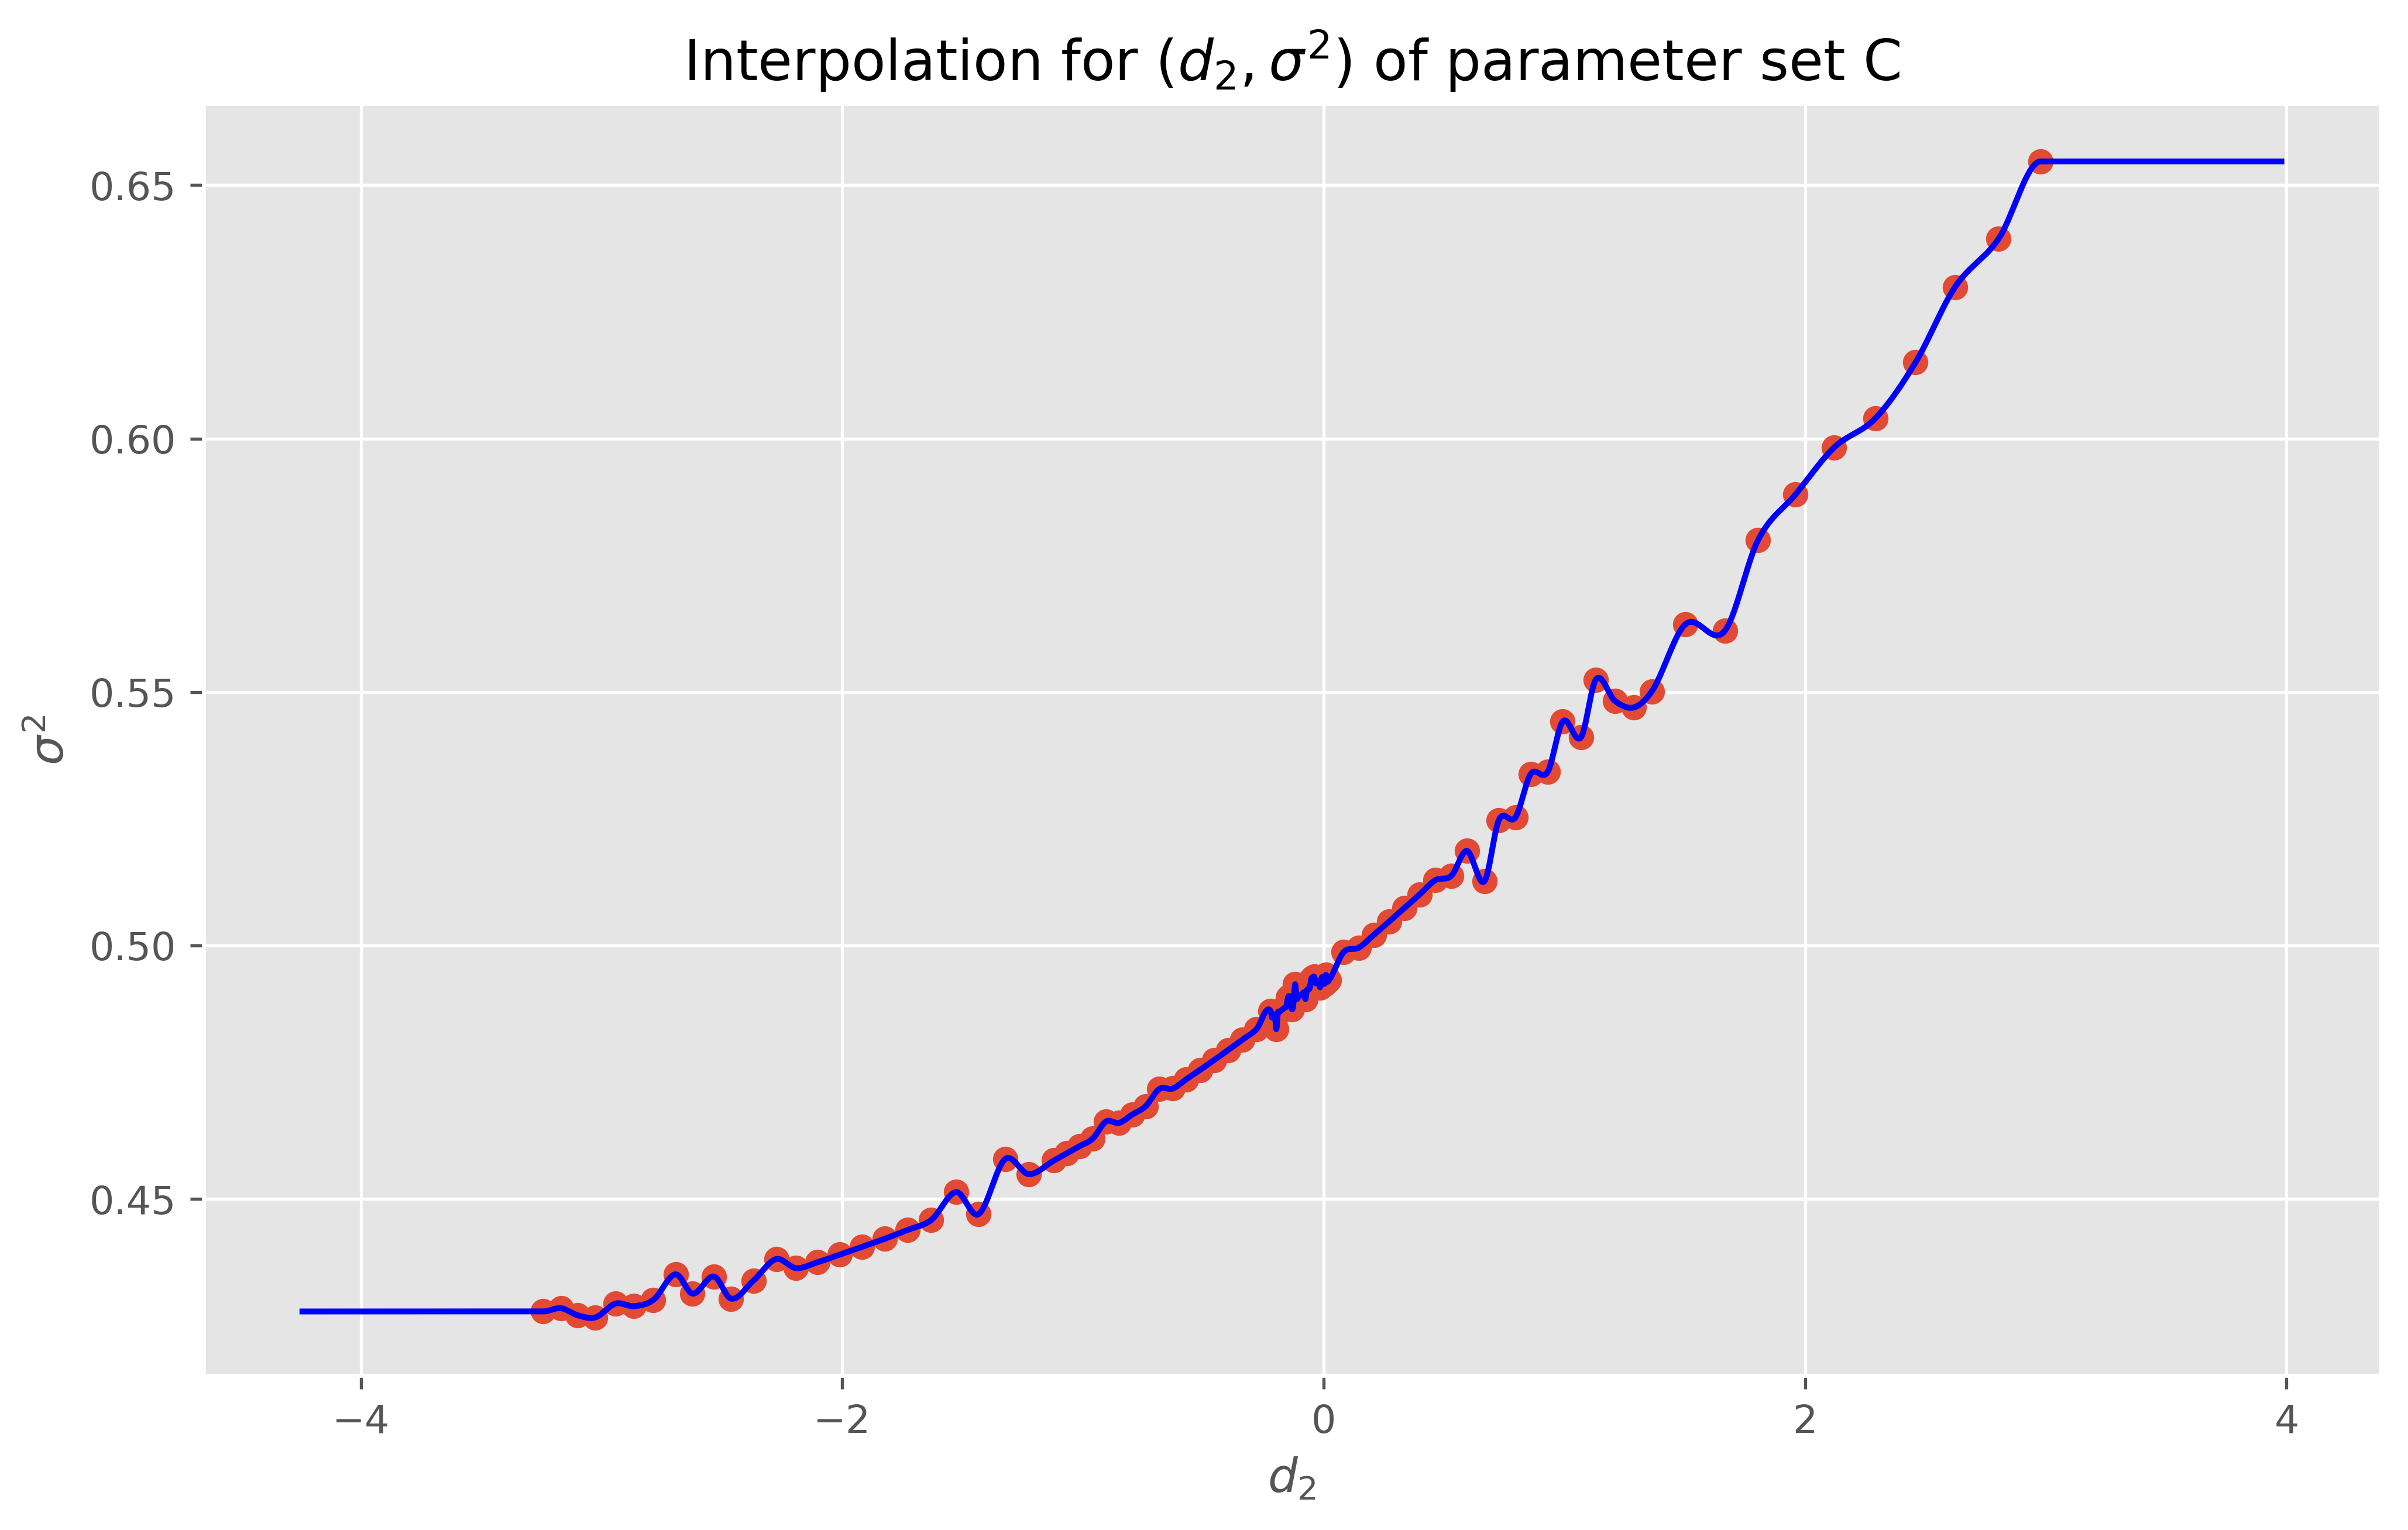

In [10]:
nvix_C.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set C")
plt.savefig('C_narrow.eps', format='eps')

# Parameter D

In [11]:
call_D = pd.read_csv("call_D.csv")
put_D = pd.read_csv("put_D.csv")
heston = {"call":call_D,"put":put_D}
nvix_D = NVIX(0,heston)
cboe_D = CBOE(0,heston)

In [12]:
0.04+(1-np.exp(-1.5*30/365))/(1.5*30/365) * (0.04-0.04)

0.04

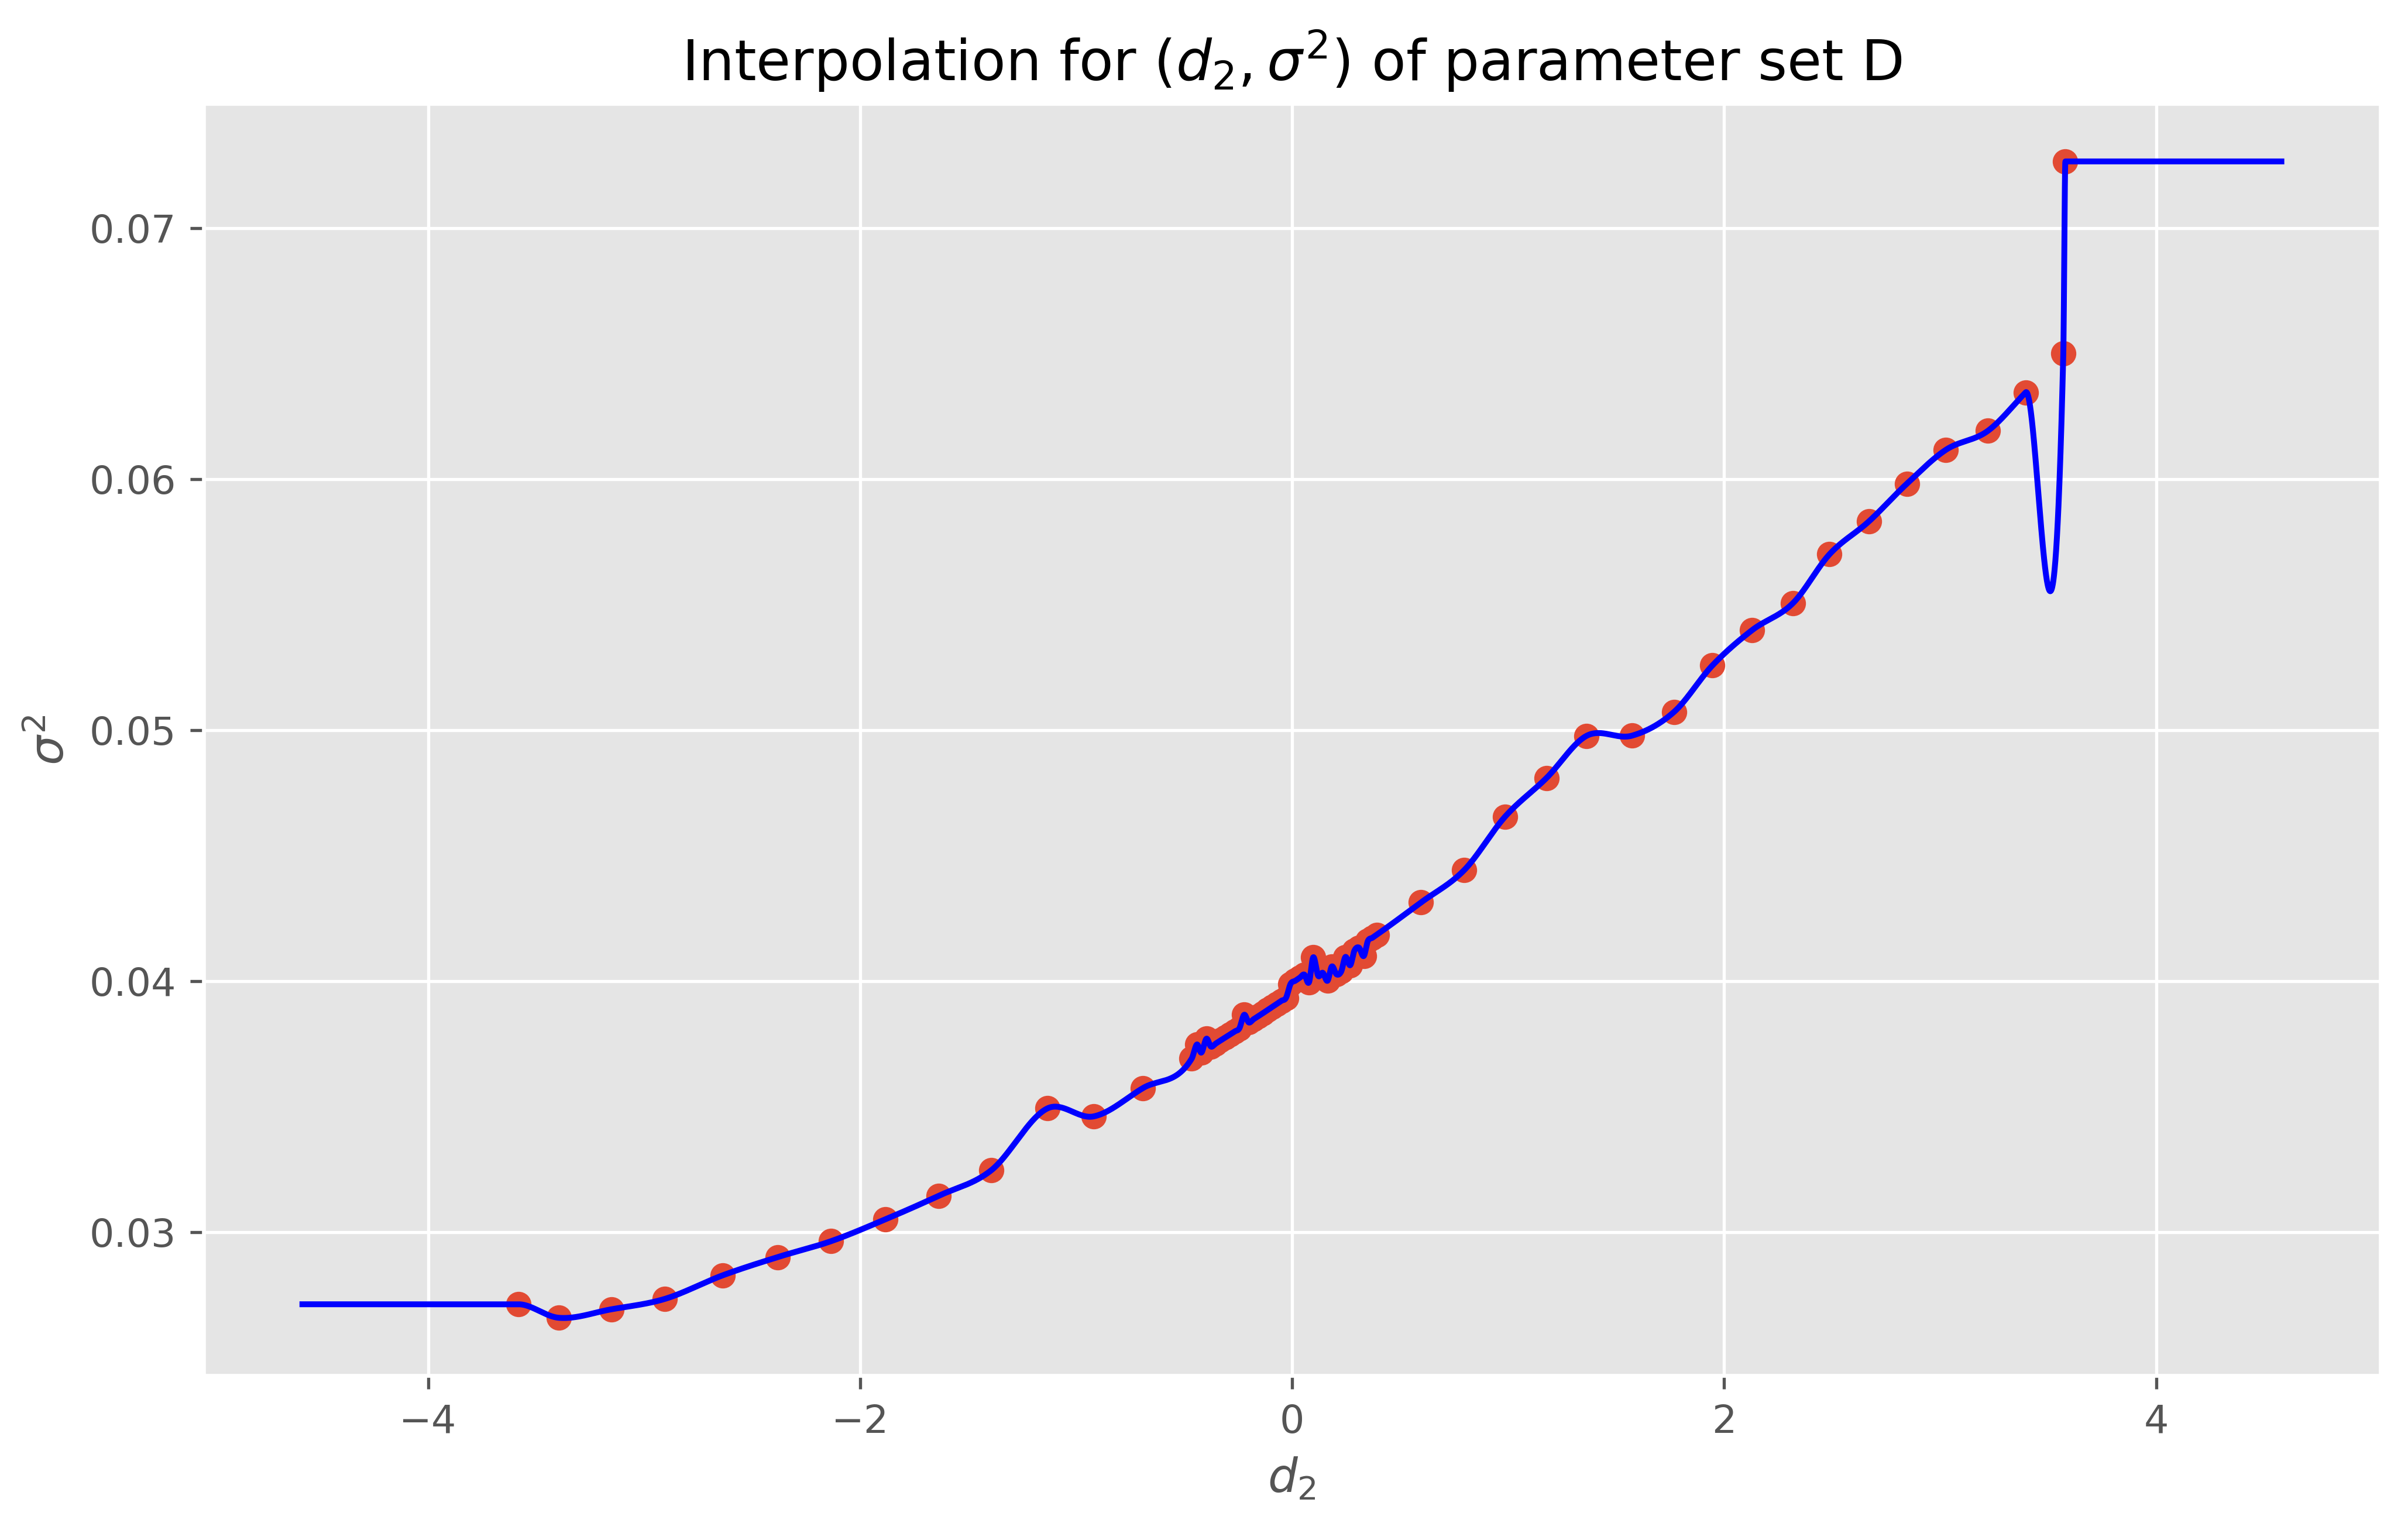

In [13]:
nvix_D.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set D")
plt.savefig('D_narrow.eps', format='eps')

In [14]:
dic = {
    "True":[0.5840029057260867,0.5840029057260867,0.49919934650767295,0.04],
    "New": [nvix_A.vol(),nvix_B.vol(),nvix_C.vol(),nvix_D.vol()],
    "CBOE":[cboe_A.vol(),cboe_B.vol(),cboe_C.vol(),cboe_D.vol()]
}
index = ["A","B","C","D"]
result = pd.DataFrame(dic,index = index).apply(lambda x:np.round(x,4),axis = 1)

In [15]:
result

,True,New,CBOE
A,0.5840,0.5842,0.5576
B,0.5840,0.5844,0.5577
C,0.4992,0.4990,0.4755
D,0.0400,0.0402,0.0364


# Wider range strike

In [16]:
call_A = pd.read_csv("call_A_wider.csv")
put_A = pd.read_csv("put_A_wider.csv")
heston = {"call":call_A,"put":put_A}
nvix_A = NVIX(0,heston)
cboe_A = CBOE(0,heston)

call_B = pd.read_csv("call_B_wider.csv")
put_B = pd.read_csv("put_B_wider.csv")
heston = {"call":call_B,"put":put_B}
nvix_B = NVIX(0,heston)
cboe_B = CBOE(0,heston)

call_C = pd.read_csv("call_C_wider.csv")
put_C = pd.read_csv("put_C_wider.csv")
heston = {"call":call_C,"put":put_C}
nvix_C = NVIX(0,heston)
cboe_C = CBOE(0,heston)

call_D = pd.read_csv("call_D_wider.csv")
put_D = pd.read_csv("put_D_wider.csv")
heston = {"call":call_D,"put":put_D}
nvix_D = NVIX(0,heston)
cboe_D = CBOE(0,heston)

dic = {
    "True":[0.5840029057260867,0.5840029057260867,0.49919934650767295,0.04],
    "New": [nvix_A.vol(),nvix_B.vol(),nvix_C.vol(),nvix_D.vol()],
    "CBOE":[cboe_A.vol(),cboe_B.vol(),cboe_C.vol(),cboe_D.vol()]
}
index = ["A","B","C","D"]
result = pd.DataFrame(dic,index = index).apply(lambda x:np.round(x,4),axis = 1)
result 

,True,New,CBOE
A,0.5840,0.5838,0.5735
B,0.5840,0.5760,0.5736
C,0.4992,0.4990,0.4906
D,0.0400,0.0393,0.0392


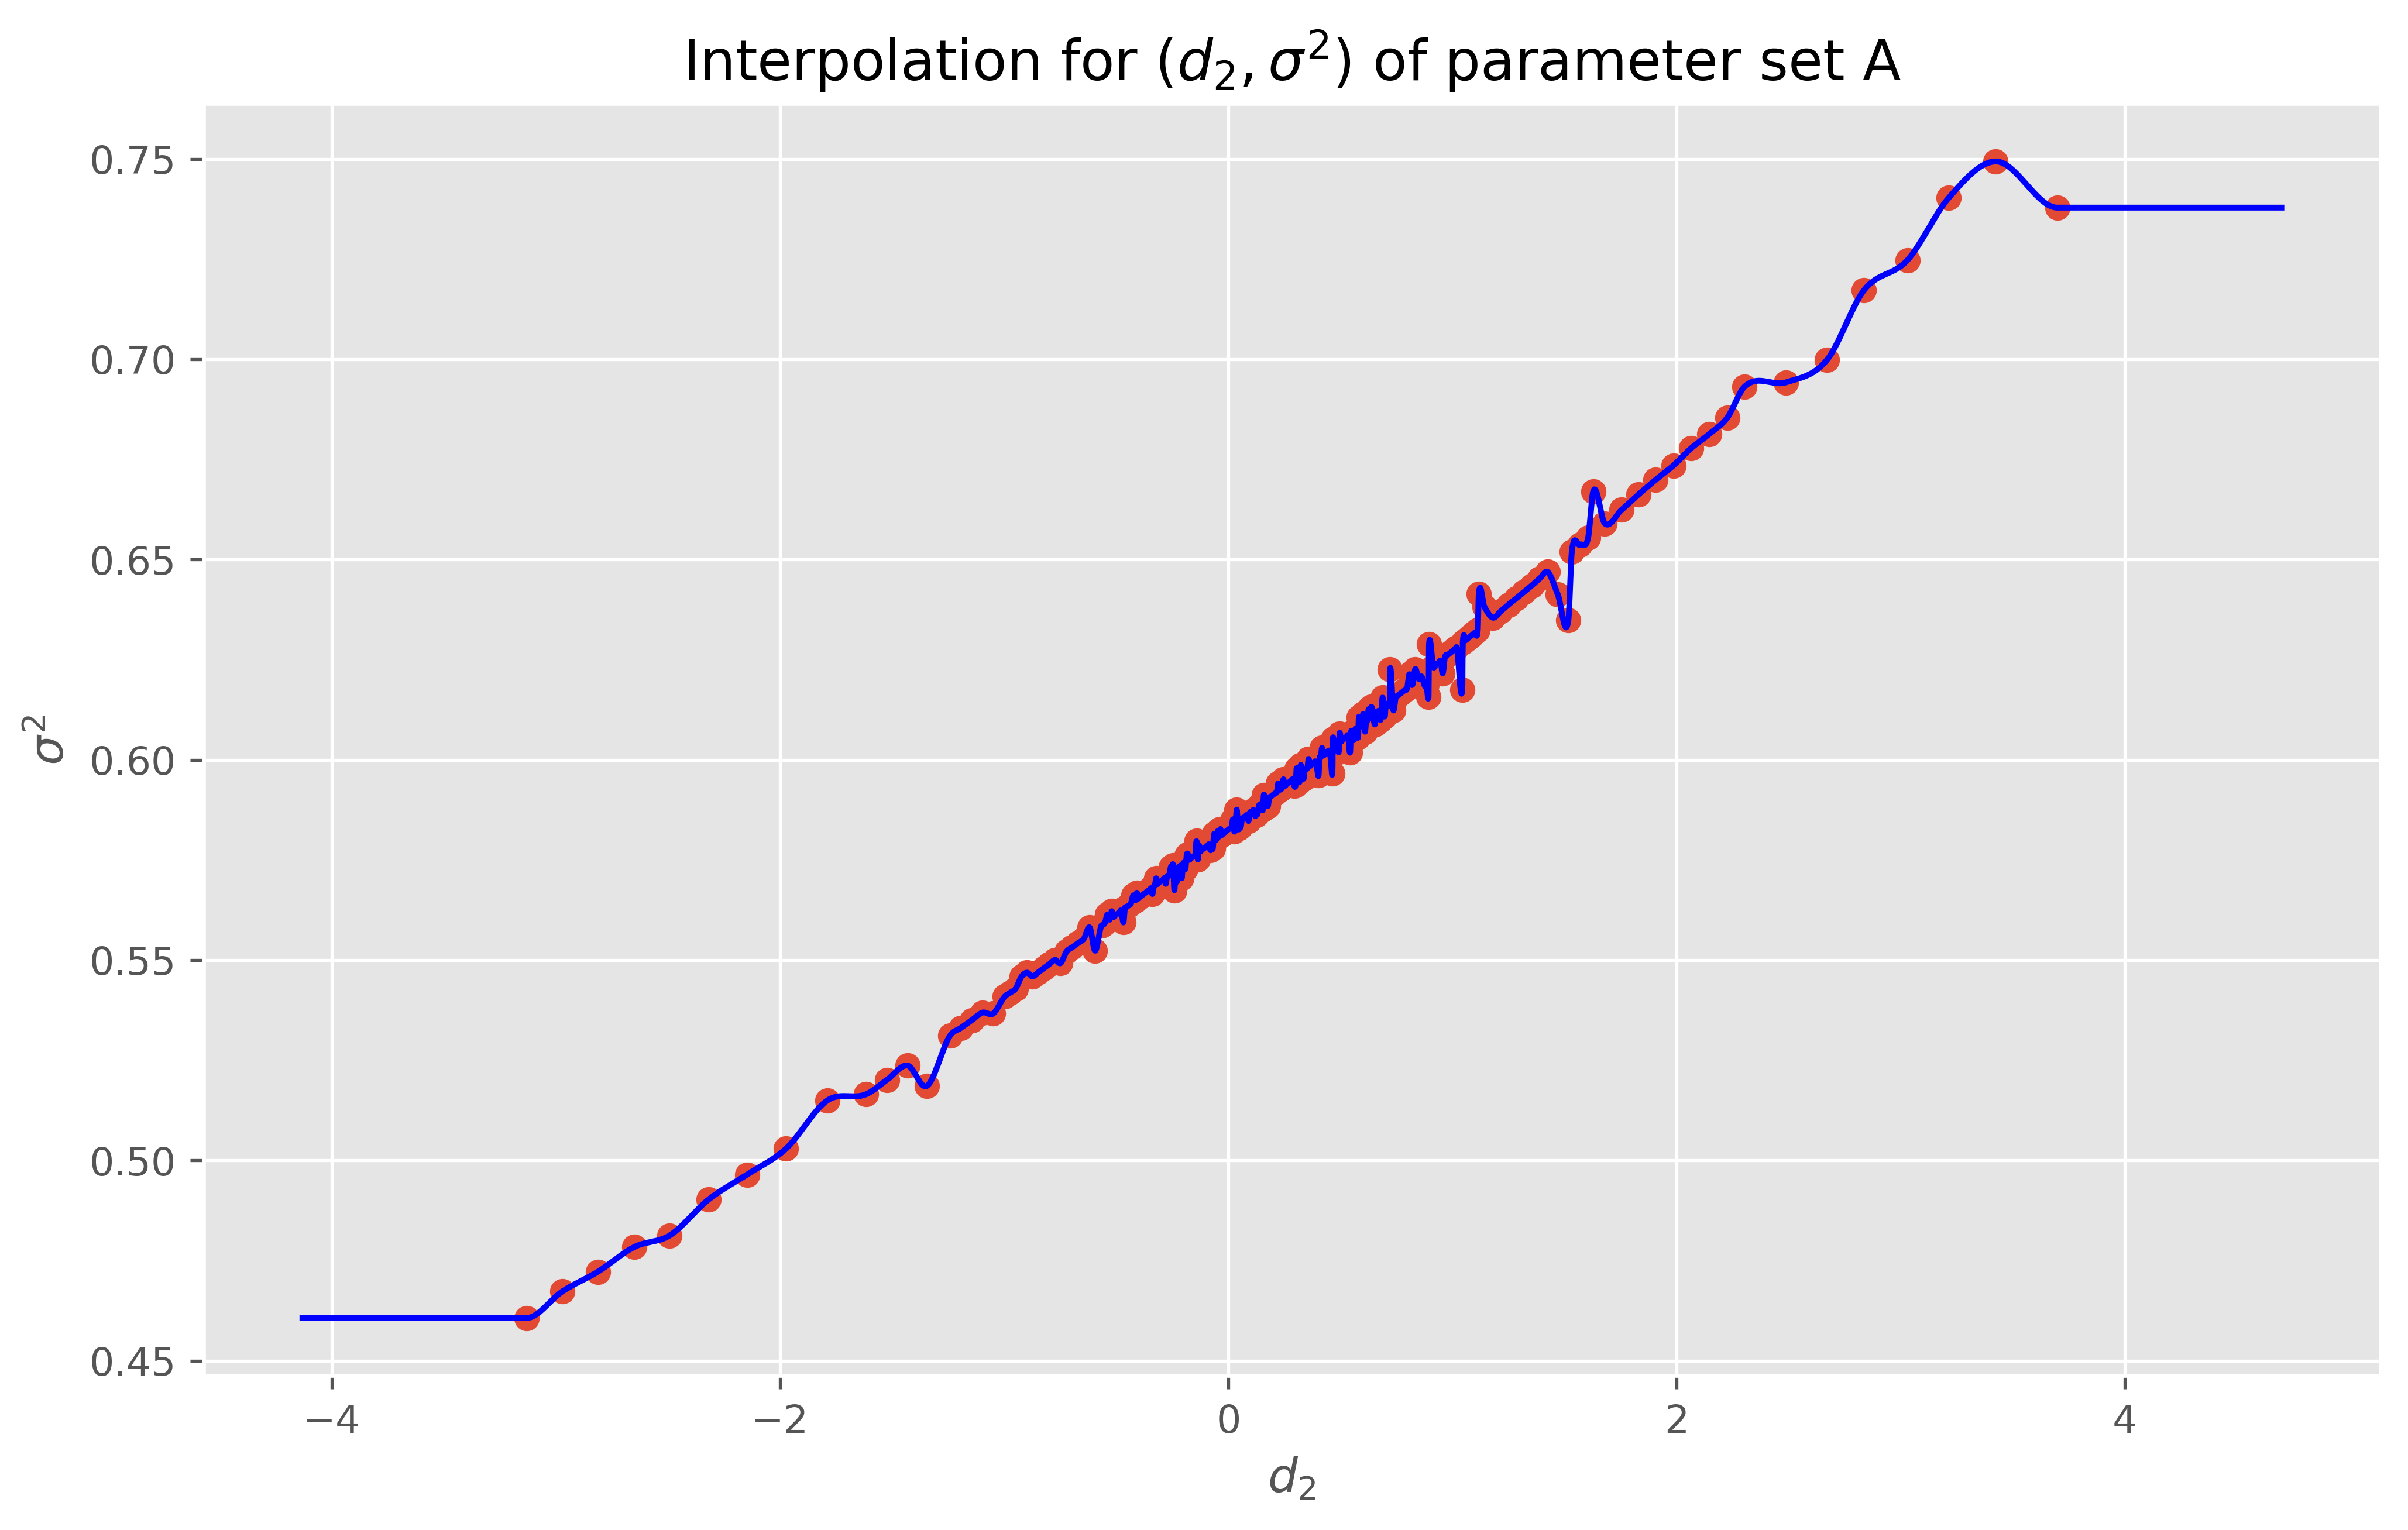

In [17]:
nvix_A.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set A")
plt.savefig('A_wide.eps', format='eps')

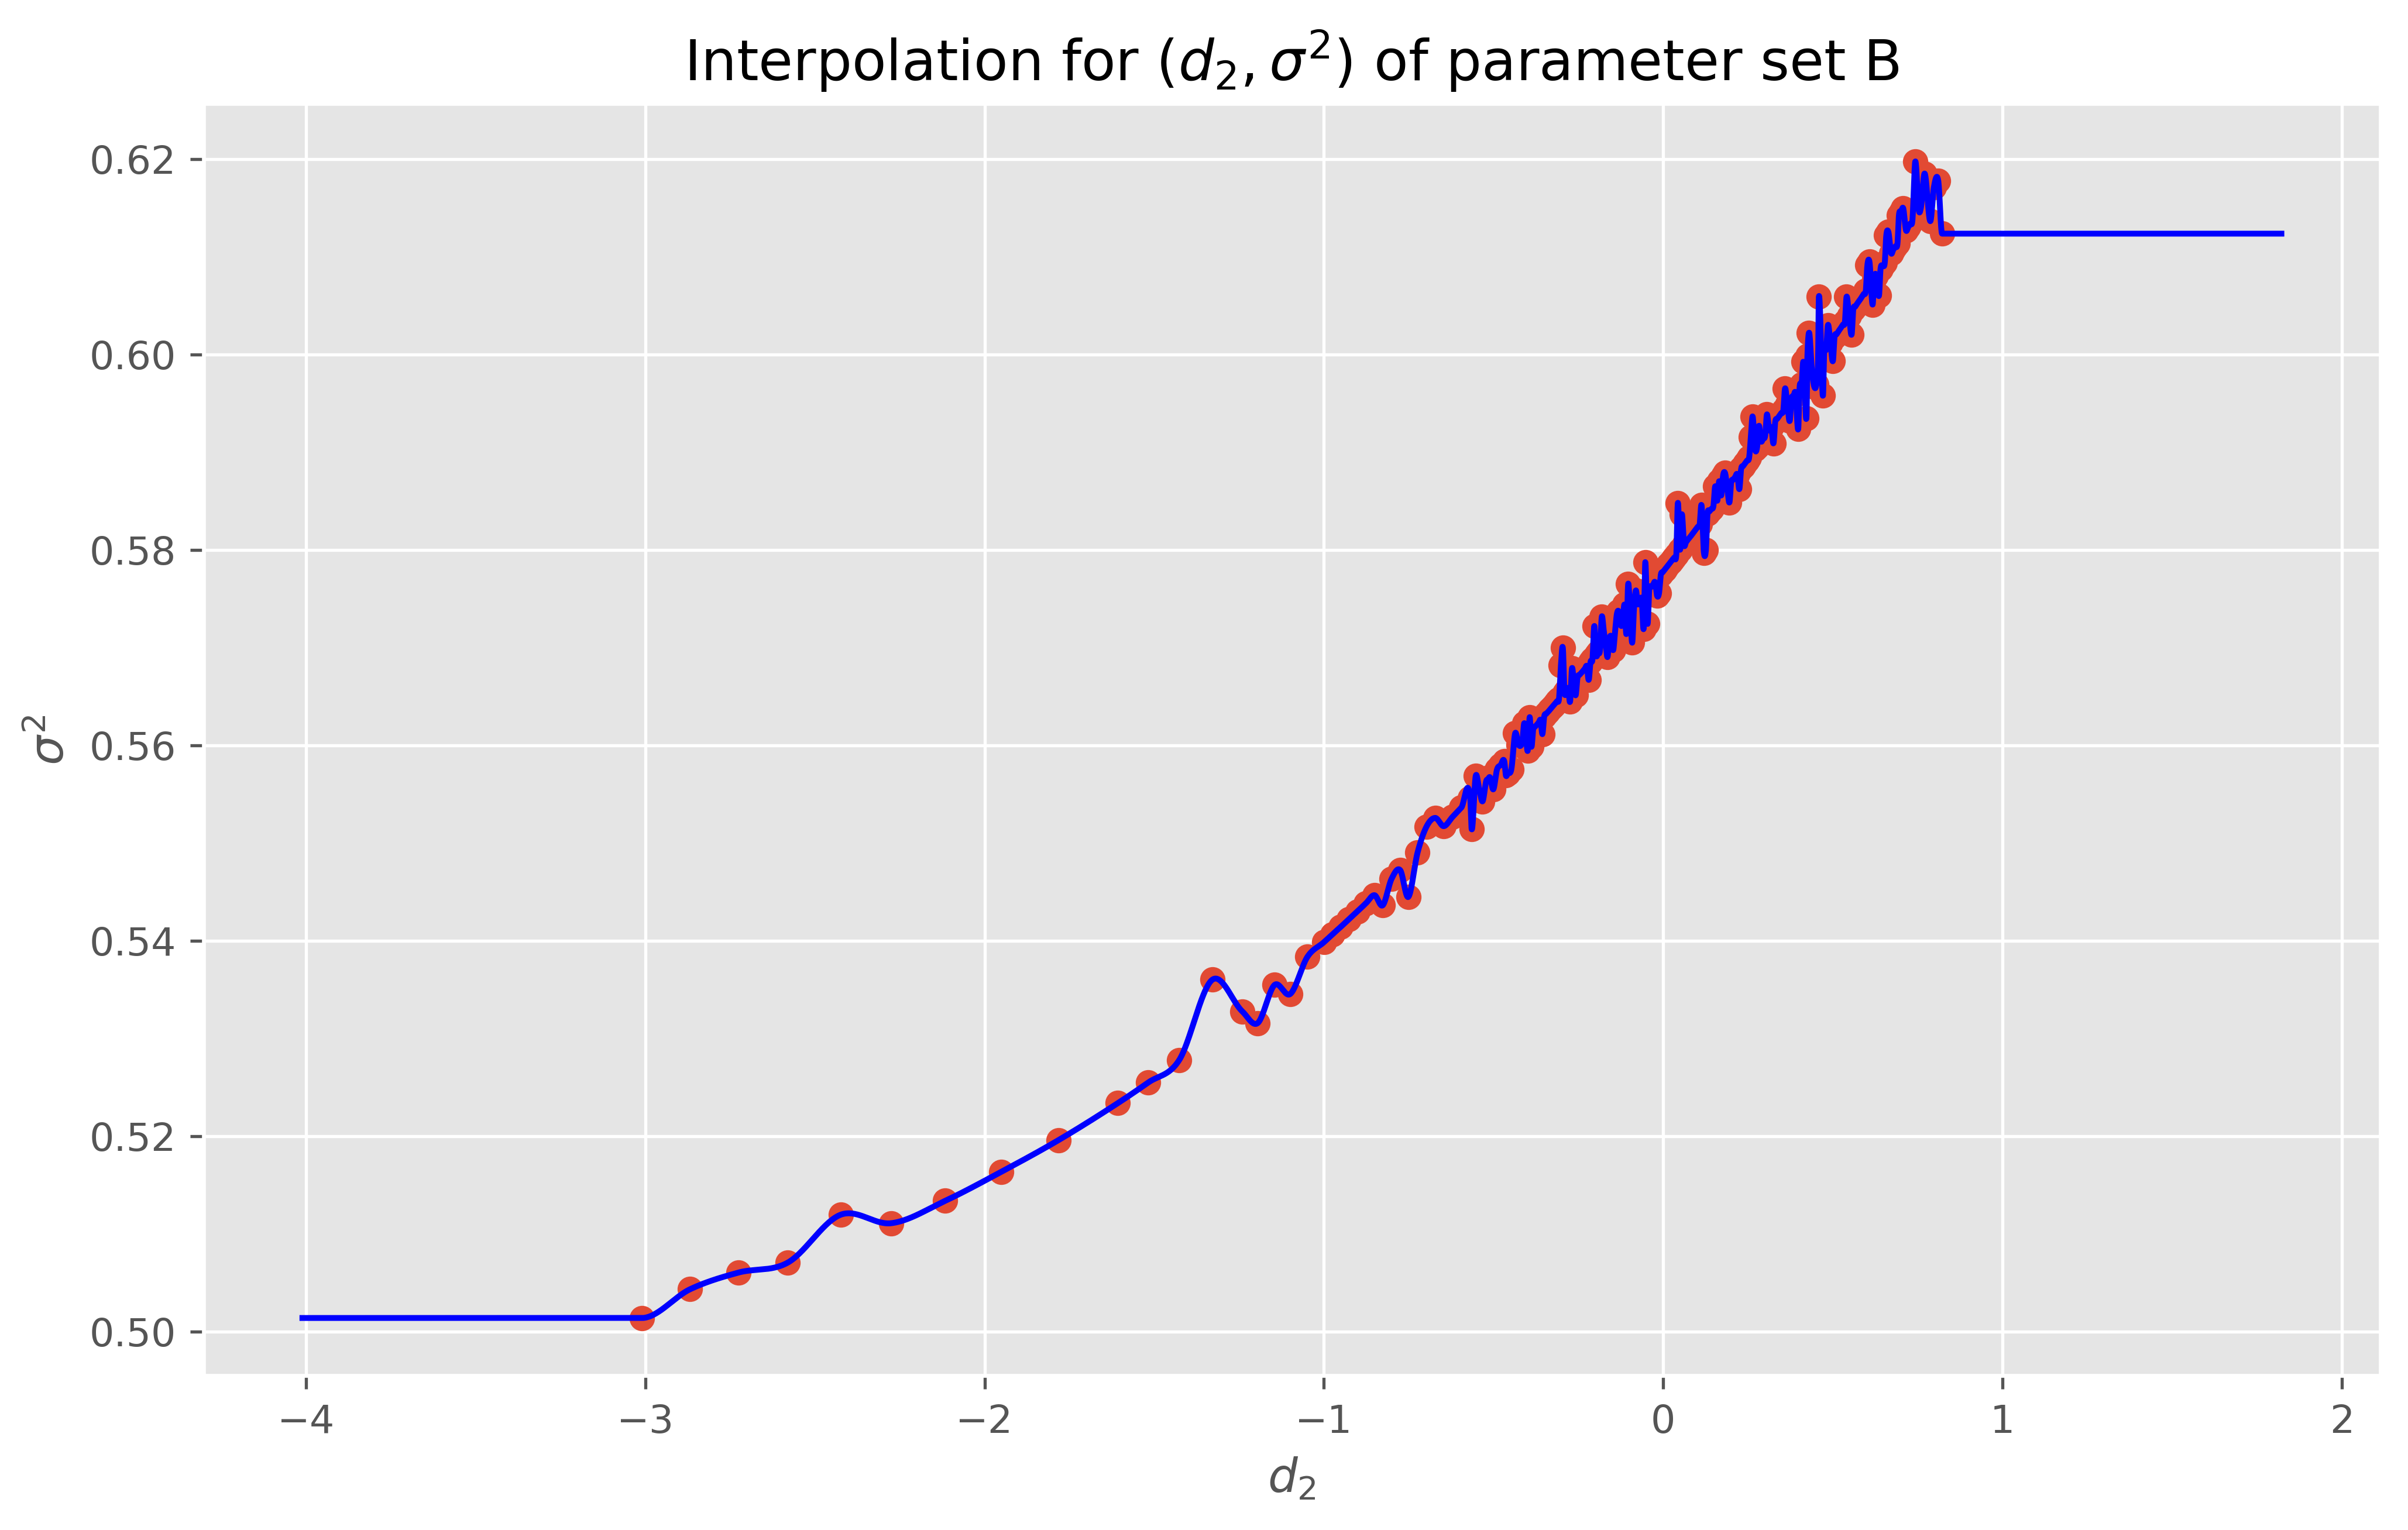

In [18]:
nvix_B.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set B")
plt.savefig('B_wide.eps', format='eps')

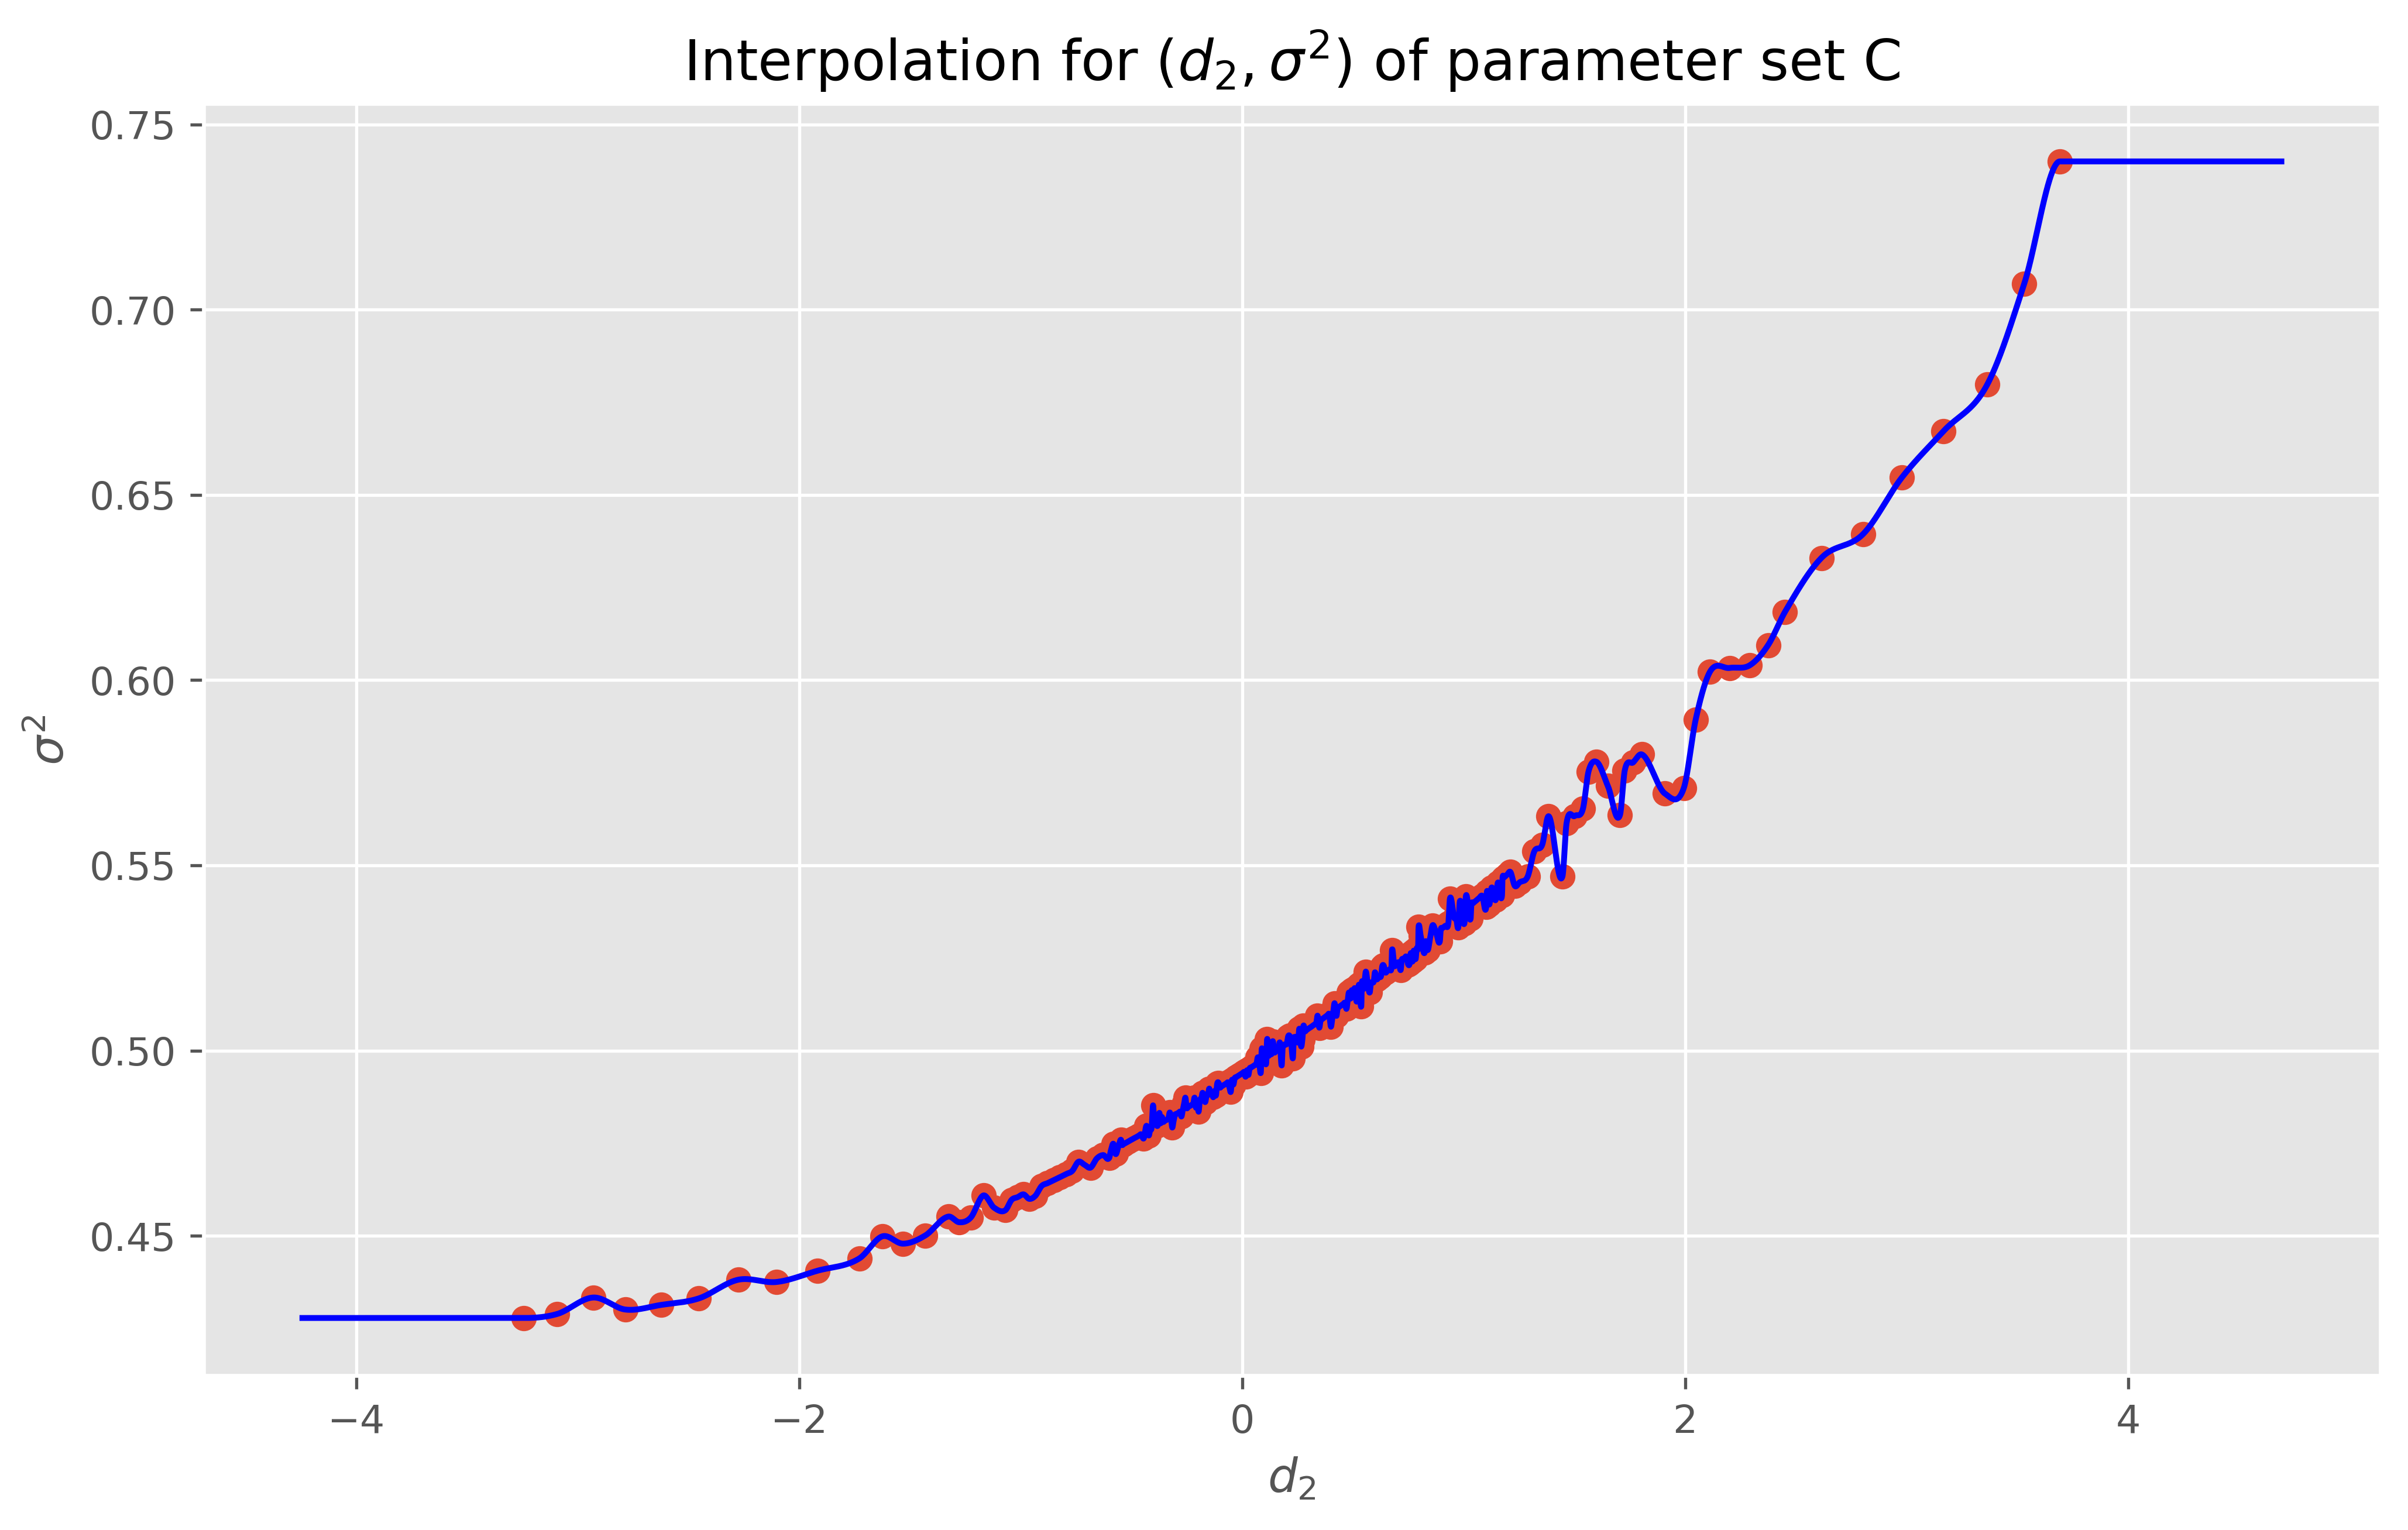

In [19]:
nvix_C.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set C")
plt.savefig('C_wide.eps', format='eps')

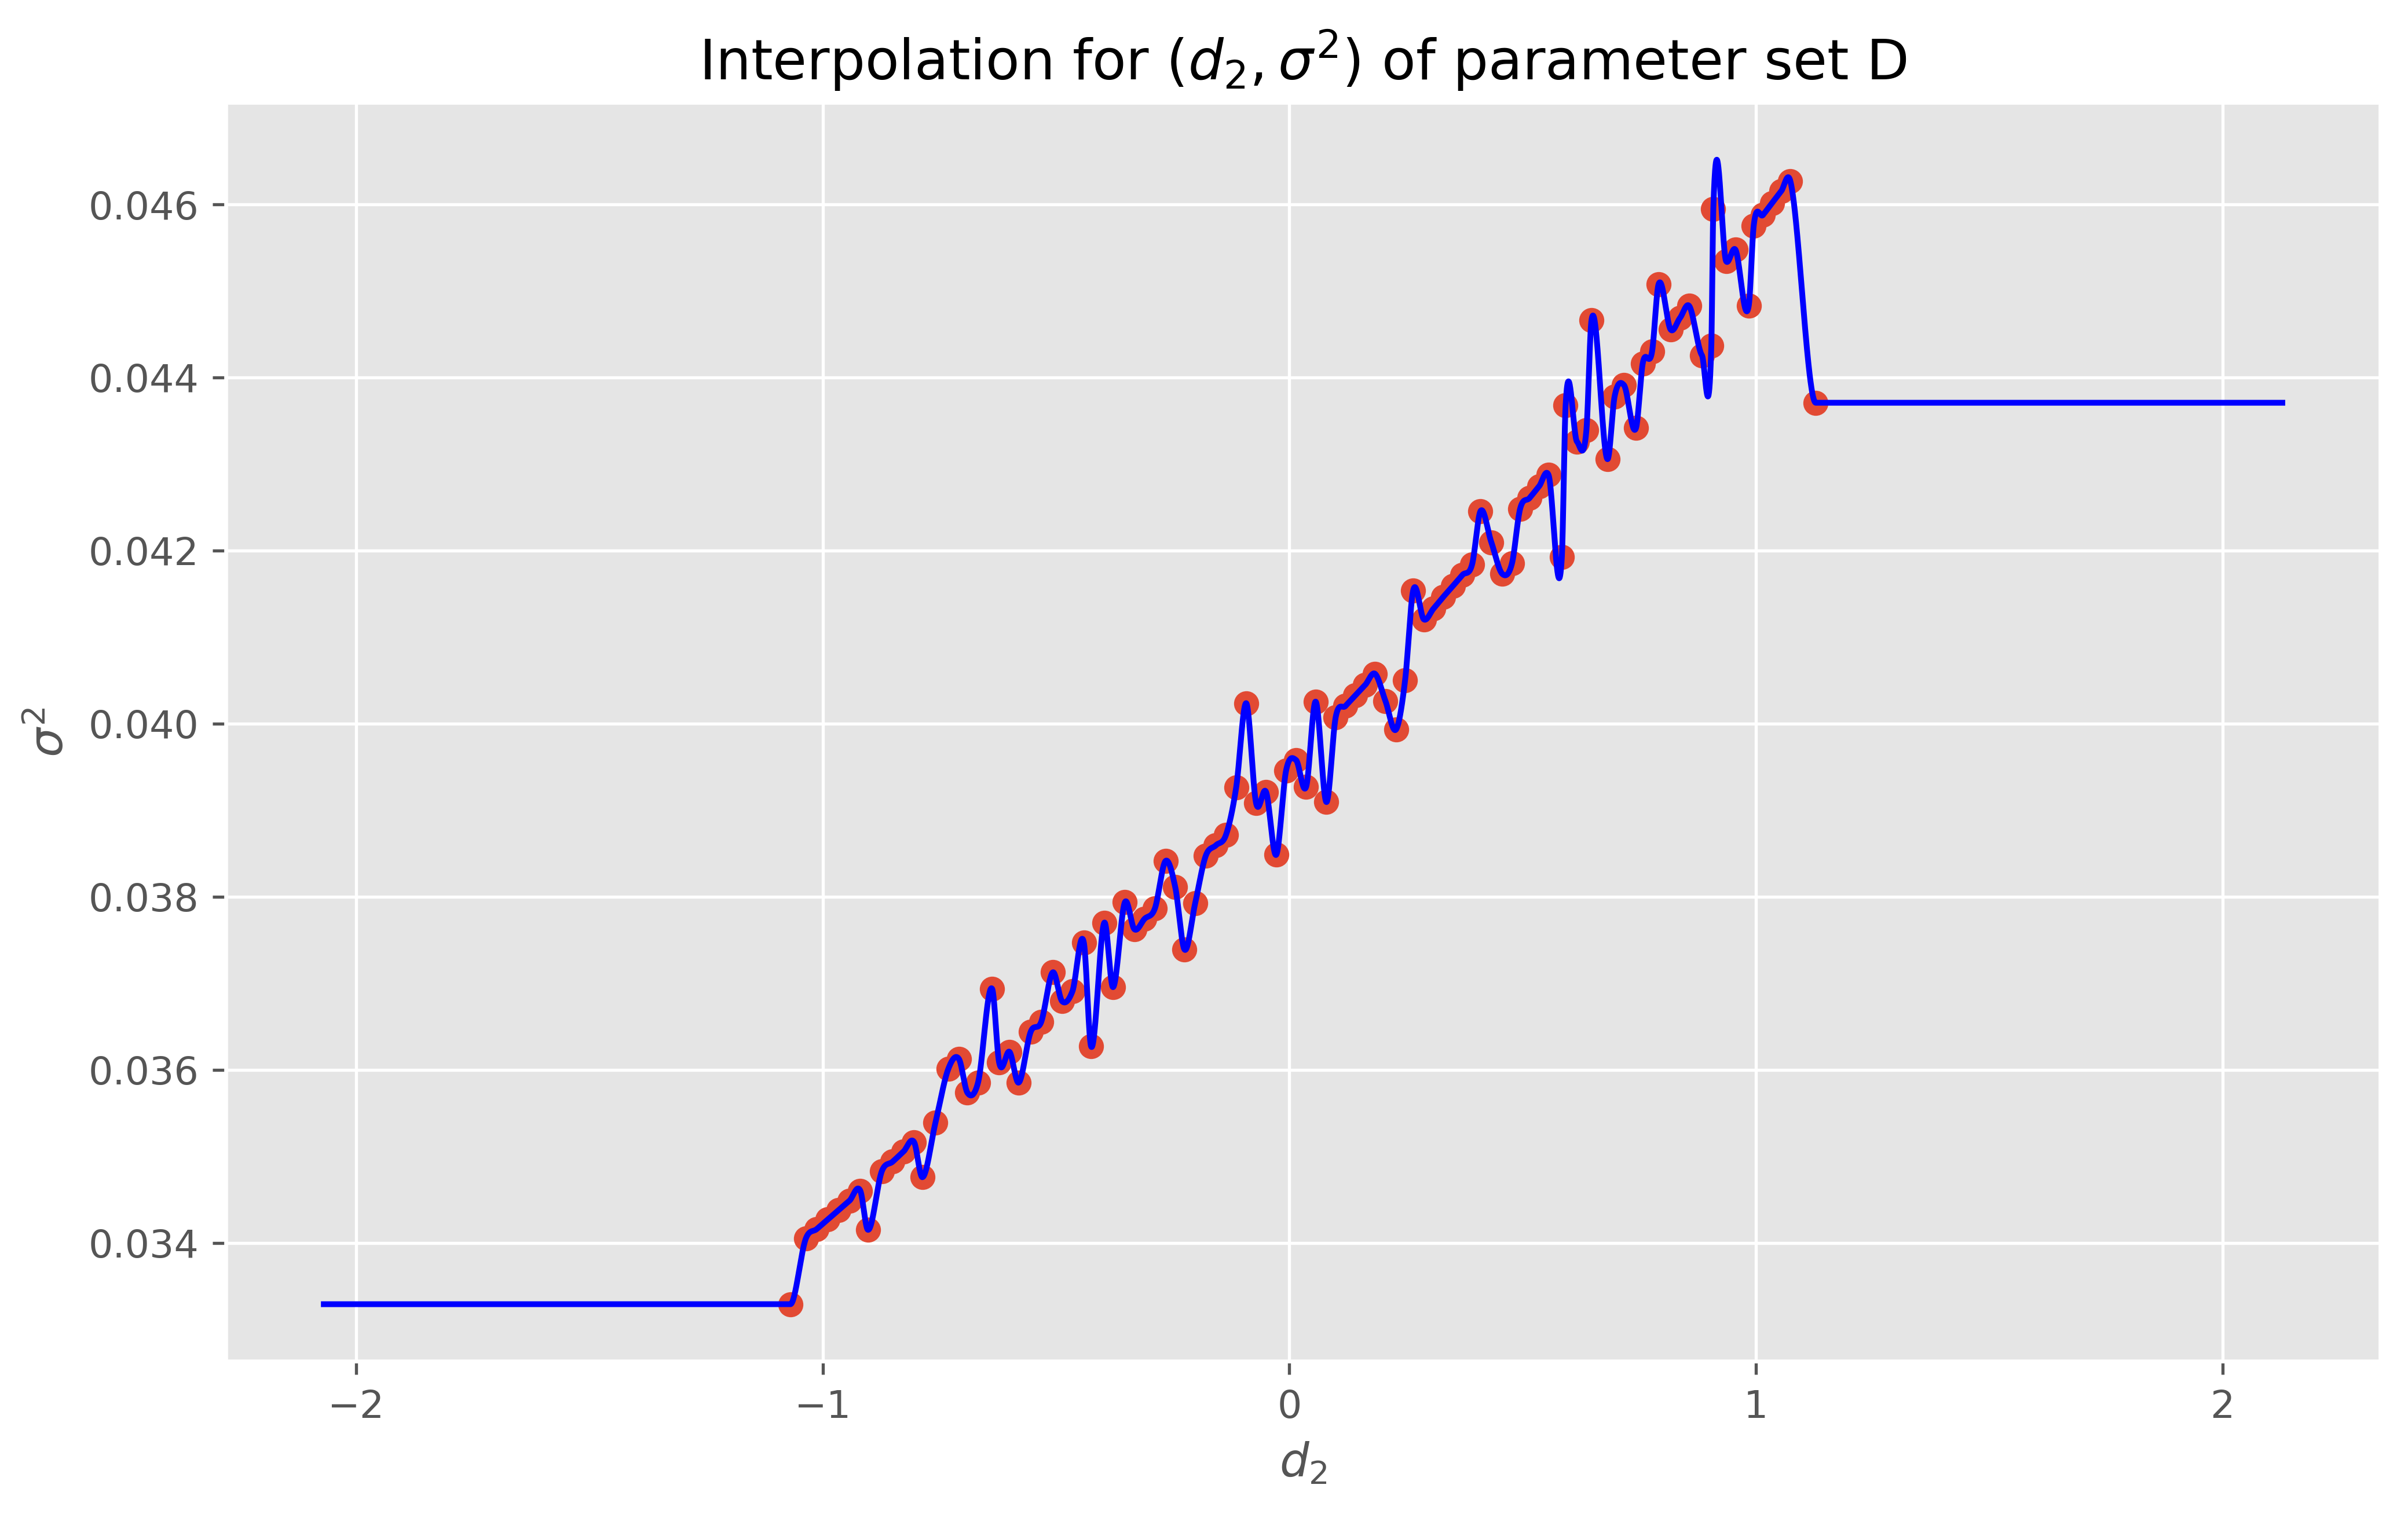

In [20]:
nvix_D.graph()
plt.title(r"Interpolation for $(d_2,\sigma^2)$ of parameter set D")
plt.savefig('D_wide.eps', format='eps')